Proj 1

In [1]:
#@title asoImports {display-mode: "form"}
import numpy as np
import pandas as pd
import pylab as pl
#import time
from tqdm.notebook import tqdm

In [2]:
#@title asoVars2 {display-mode: "form"}
vs=[]
us=[]     
hvs=[]

#block_no=np.full(2,-1)
#trial_dur=np.full(1200,0)
 #att

thv = .985
tv = .925
tu = .995
a1 = 2.
a2 = 3.
t1 = 1.25
t2 = 1.5
b = 4.
g=3.
g1=3.
g2=1.
neLC=1.
#i=0.
cLC=3.5

biasPL= -0.5 #bias primeTarg?
#threshPT= 0.75
noisePTsd=0.25

SelfPT= 1.25
CrossPT= 0.25
inhPT= -1.

#conPrime= 2

#conTarget= 10.


noiseMaskSD=0.
biasMask= 0 #-1.25 #bias primeTarg?
SelfMask= 0 #1.5
CrossMask= 0 #0.75
conMask= 0 #1.5
inhMask= 0 #-1.

landaM=0.95

biasResponse= -2. #bias primeTarg?
SelfResponse= 1.25
conResponse= 2.5
inhResponse= -1.
#threshResponse=0.9
landaR=.95

landaP=0.95
alphaP=1.

gainRate=np.ones(3)

In [3]:
#@title asoFunctionsDef {display-mode: "form"}
def sigmoidMe(x):
    return 1 / (1 + np.exp(-x))
# The derivative of the Sigmoid function.
# This is the gradient of the Sigmoid curve.
# It indicates how confident we are about the existing weight.
#def __sigmoid_derivative(self, x):
    #return x * (1 - x)
def present(self,trialDur1, x, y):
    #np.concatenate(arrayInp
    #for i in range(trialDur):
    return np.concatenate(np.zeros(x-0), np.ones(y-x), np.zeros(trialDur1-y))

def runLIFTmp(biasPL, updatedBeforeJ, updatedBeforeJnot, unitIndx, noise, selfExitation, crossActivation, connectionWeight, lateralInhibit):
          updatedBeforeTmp=biasPL+updatedBeforeJ * selfExitation + np.abs(unitIndx-1) * crossActivation + unitIndx * connectionWeight + updatedBeforeJnot * lateralInhibit + noise
          #updatedBefore=landaP * updatedBefore + (1. - landaP) * (1. /(1. + np.exp (-updatedBeforeTmp * 1))
          return updatedBeforeTmp

def runLIF(updatedBefore, updatedBeforeTmp, landaP, gainRate): #unitIndx, noise, selfExitation, crossActivation, connectionWeight, lateralInhibit, landaP):
      #updatedBeforeTmp=updatedBefore * selfExitation + np.abs(unitIndx-1) * crossActivation + unitIndx * connectionWeight + np.abs(unitIndx-1) * lateralInhibit + noise
      updatedBefore=landaP * updatedBefore + (1. - landaP) * sigmoidMe(updatedBeforeTmp * gainRate * 1) #(1. /(1. + np.exp (-updatedBeforeTmp * 1))
      return updatedBefore
def runLIFTmpMask( updatedBeforeJ,updatedBeforePrimeTargetJ, updatedBeforePrimeTargetJnot, unitIndx, unitIndxPrimeTargetJ, unitIndxPrimeTargetJnot, noise, selfExitation, crossActivation, connectionWeight, lateralInhibit):
          updatedBeforeTmp=updatedBeforeJ * selfExitation + unitIndxPrimeTargetJ * crossActivation+ unitIndxPrimeTargetJnot * crossActivation + unitIndx * connectionWeight + updatedBeforePrimeTargetJ * lateralInhibit + updatedBeforePrimeTargetJnot * lateralInhibit + noise
          #updatedBefore=landaP * updatedBefore + (1. - landaP) * (1. /(1. + np.exp (-updatedBeforeTmp * 1))
          return updatedBeforeTmp
def runLIFTmpResponse( biasResponse, updatedBeforeJ, updatedBeforeJnot, updatedBeforeJprime,updatedBeforeJtarget, selfExitation, connectionWeight, lateralInhibit, noise):
          updatedBeforeTmp=biasResponse + updatedBeforeJ * selfExitation + updatedBeforeJnot * lateralInhibit + updatedBeforeJprime *  connectionWeight  + updatedBeforeJtarget * connectionWeight + noise
          #updatedBefore=landaP * updatedBefore + (1. - landaP) * (1. /(1. + np.exp (-updatedBeforeTmp * 1))
          return updatedBeforeTmp

#def runLIFmask(self, updatedBefore, updatedBeforeTmp, landaP, gainRate): #unitIndx, noise, selfExitation, crossActivation, connectionWeight, lateralInhibit, landaP):
      #updatedBeforeTmp=updatedBefore * selfExitation + np.abs(unitIndx-1) * crossActivation + unitIndx * connectionWeight + np.abs(unitIndx-1) * lateralInhibit + noise
      #updatedBefore=landaP * updatedBefore + (1. - landaP) * sigmoidMe(updatedBeforeTmp * gainRate * 1) #(1. /(1. + np.exp (-updatedBeforeTmp * 1))
      #return updatedBefore
def runLIFall(conPrimeArr, block_no,trial_dur,v, u,hv):
  for m in range(conPrimeArr.size): #conTargetArr[m] #
    conPrime=conPrimeArr[m]
    conTarget=conTargetArr[m]

    inputLayerPrime=np.zeros(2)
    inputLayerPrimeTmp=np.zeros(2)
    
    inputLayerTarget=np.zeros(2)
    inputLayerTargetTmp=np.zeros(2)
    
    inputLayerMask=np.zeros(2)
    inputLayerMaskTmp=np.zeros(2)

    inputLayerResponse=np.zeros(2)
    inputLayerResponseTmp=np.zeros(2)

    for t in range(block_no.size): #tqdm(range(block_no.size)):
      
      training_set_inputsPrimeTmp=np.empty(2)
      training_set_inputsTargetTmp=np.empty(2)
      training_set_inputsMaskTmp=np.empty(2)

      neLC=0
      
      PrimeDurTmp=np.concatenate((np.zeros(InterTrial), np.ones(PrimeDur) , np.zeros(trial_dur.size-InterTrial+PrimeDur)),axis=None)
      MaskDurTmp=np.concatenate((np.zeros(InterTrial+PrimeDur), np.ones(MaskDur) , np.zeros(trial_dur.size-InterTrial+PrimeDur+MaskDur)),axis=None)
      TargetDurTmp=np.concatenate((np.zeros(InterTrial+PrimeDur+MaskDur+MaskTargetISI), np.ones(TargetDur) , np.zeros(trial_dur.size-InterTrial+PrimeDur+MaskDur+MaskTargetISI+TargetDur)),axis=None)
      
      #PrimeDurTmp=present(trial_dur.size, InterTrial, InterTrial+PrimeDur)
      #MaskDurTmp=present(trial_dur.size, InterTrial+PrimeDur, InterTrial+PrimeDur+MaskDur)
      #TargetDurTmp=present(trial_dur.size, InterTrial+PrimeDur+MaskDur+MaskTargetISI, InterTrial+PrimeDur+MaskDur+MaskTargetISI+TargetDur)


      for i in range(trial_dur.size):


        noisePT=np.zeros(2)
        noiseMask=np.zeros(2)

        for j in range(2): #training_set_inputsPrime.size):
          noiseMask[j]=np.random.normal(0, noiseMaskSD)
          noisePT[j]=np.random.normal(0, noisePTsd)             
          #Prime
          #PrimeDurTmp=present(trial_dur.size, InterTrial, InterTrial+PrimeDur)
          training_set_inputsPrimeTmp[j]=PrimeDurTmp[i] * training_set_inputsPrime[j]

          inputLayerPrimeTmp[j]=runLIFTmp(biasPL, inputLayerPrime[j], inputLayerPrime[np.abs(j-1)], training_set_inputsPrimeTmp[j], noisePT[j], SelfPT, CrossPT, conPrime, inhPT)

          inputLayerPrime[j]= runLIF(inputLayerPrime[j],inputLayerPrimeTmp[j], landaP,gainRate[j]) #inputLayerPrime[j]
          inputLayerPrimeAll[m,t,j,i]=inputLayerPrime[j]
          #Target
          #TargetDurTmp=present(trial_dur.size, InterTrial+PrimeDur+MaskDur+MaskTargetISI, InterTrial+PrimeDur+MaskDur+MaskTargetISI+TargetDur)
          training_set_inputsTargetTmp[j]=TargetDurTmp[i] * training_set_inputsTarget[j] 

          inputLayerTargetTmp[j]=runLIFTmp(biasPL, inputLayerTarget[j], inputLayerTarget[np.abs(j-1)], training_set_inputsTargetTmp[j], noisePT[j], SelfPT, CrossPT, conTarget, inhPT)

          inputLayerTarget[j]= runLIF(inputLayerTarget[j],inputLayerTargetTmp[j], landaP,gainRate[j]) #inputLayerPrime[j]
          inputLayerTargetAll[m,t,j,i]=inputLayerTarget[j]
        
        #Mask
        #MaskDurTmp=present(trial_dur.size, InterTrial+PrimeDur, InterTrial+PrimeDur+MaskDur)
        training_set_inputsMaskTmp[0]=MaskDurTmp[i] *training_set_inputsMask[0] 
        training_set_inputsMaskTmp[1]=MaskDurTmp[i] *training_set_inputsMask[1]

        
        #def runLIFTmpMask(self, updatedBeforeJ,updatedBeforePrimeTargetJ, updatedBeforePrimeTargetJnot, unitIndx, unitIndxPrimeTargetJ, unitIndxPrimeTargetJnot, noise, selfExitation, crossActivation, connectionWeight, lateralInhibit):
        inputLayerMaskTmp[0]=runLIFTmpMask(inputLayerMask[0], inputLayerPrime[0],inputLayerPrime[1], training_set_inputsMaskTmp[0], training_set_inputsPrimeTmp[0],training_set_inputsPrimeTmp[1],noiseMask[0], SelfMask, CrossMask, conMask, inhMask)
        inputLayerMaskTmp[1]=runLIFTmpMask(inputLayerMask[1], inputLayerTarget[0],inputLayerTarget[1], training_set_inputsMaskTmp[1], training_set_inputsTargetTmp[0],training_set_inputsTargetTmp[1],noiseMask[1], SelfMask, CrossMask, conMask, inhMask)

        inputLayerMask[0]= runLIF(inputLayerMask[0],inputLayerMaskTmp[0], landaM,gainRate[2]) #inputLayerPrime[j]
        inputLayerMaskAll[m,t,0,i]=inputLayerMask[0]
        inputLayerMask[1]= runLIF(inputLayerMask[1],inputLayerMaskTmp[1], landaM,gainRate[2]) #inputLayerPrime[j]
        inputLayerMaskAll[m,t,1,i]=inputLayerMask[1]

        #Att
        neLC=0
        for j in range(2): #training_set_inputsPrime.size):
        
          if inputLayerPrime[j] >threshPT or inputLayerTarget[j] >threshPT:
            neLC=1
        #else:
          #neLC=0
          
        v =  tv * v + (1. - tv) * sigmoidMe(g * (a1 * v - b * u + neLC - t1))
        u = tu * u + (1. - tu) * sigmoidMe(g * (a2 * v - t2)) 
        hv = thv * hv + (1. - thv) * v
        
        for j in range(3): #training_set_inputsPrime.size):
          if hv * cLC> 1.:
            gainRate[j]=hv * cLC
          else:
            gainRate[j]=1
        #print (gainRate[0],gainRate[1],gainRate[2])
        inputLayerAttAll[m,t,0,i]=v
        inputLayerAttAll[m,t,1,i]=u
        inputLayerAttAll[m,t,2,i]=hv

        #Resp
        #outaY[i] = biasOut + outaX[i] * SelfO + outbLX[i] * conResponse + outbRX[i] * conResponse + outaX[(short)(~i) + 2] * inhO + samplesR1; //- outaY(i)
        for j in range(2): #training_set_inputsPrime.size):
          #TargetDurTmp=present(trial_dur.size, InterTrial+PrimeDur+MaskDur+MaskTargetISI, InterTrial+PrimeDur+MaskDur+MaskTargetISI+TargetDur)
          #training_set_inputsTarget[0]=TargetDurTmp[i]
          #noisePT[j]=np.random.normal(0, .5)
          inputLayerResponseTmp[j]=runLIFTmpResponse(biasResponse, inputLayerResponse[j],  inputLayerResponse[np.abs(j-1)], inputLayerPrime[j], inputLayerTarget[j], SelfResponse, conResponse, inhResponse, noisePT[j])

          inputLayerResponse[j]= runLIF(inputLayerResponse[j],inputLayerResponseTmp[j], landaR,gainRate[j]) #inputLayerPrime[j]
          inputLayerResponseAll[m,t,j,i]=inputLayerResponse[j]
          if inputLayerResponse[j]>threshResponse and block_no[t]==-1:
            block_no[t]=i
            #return 
          #print(inputLayerResponse[j],inputLayerResponseTmp[j])
          #return  inputLayerResponseRT

    #print(PrimeDurTmp)
    for k in range(2):
      inputLayerMask[k]=0
      inputLayerPrime[k]=0
      inputLayerResponse[k]=0
      inputLayerTarget[k]=0
    u=0
    hv=0
    v=.3
    modelRT[m]=block_no
    print(m)
    block_no.fill(-1)
          #trials save
          

In [4]:
#@title Default title text
from scipy.signal import find_peaks, peak_prominences
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

#@title asoVars1 {display-mode: "form"}
#layer1 = LIF(3, 3, trial_dur.size,InterTrial=500,PrimeDur=50,MaskDur=0,MaskTargetISI=85,TargetDur=200)
number_of_neurons=3
number_of_inputs_per_neuron= 3
#trial_dur.size,
InterTrial=500
PrimeDur=50
MaskDur=0 # no mask used here
MaskTargetISI=85  # prime-target ISI
TargetDur=200

conPrimeArr= np.array([1.5,2.0,2.5,3.])
conTargetArr= np.array([3.,3.,3.,3.]) 
#conPrimeArr= np.array([3.,3.,3.,3.]) 
#conTargetArr= np.array([1.5,2.0,2.5,3.])

v = .3
u = 0.
hv = 0.

threshPT= 0.75
threshResponse=0.9

#@title asoFunctionsCall {display-mode: "form"}
#model =1
block_no=np.full(20000,-1)
trial_dur=np.full(1200,0)
#conPrimeArr=np.full(3,0)

training_set_inputsTarget = np.array([1, 0])
training_set_inputsMask = np.array([0, 0])

modelRT0Count1Mean2STD3Pre4Mis=np.empty((conPrimeArr.size,5))
modelRT=np.empty((conPrimeArr.size,block_no.size))
inputLayerAttAll=np.empty((conPrimeArr.size,block_no.size,  number_of_inputs_per_neuron, trial_dur.size))
inputLayerPrimeAll=np.empty((conPrimeArr.size,block_no.size,  number_of_inputs_per_neuron, trial_dur.size))
inputLayerPrimeTmp=np.empty((conPrimeArr.size,block_no.size,  number_of_inputs_per_neuron, trial_dur.size))
inputLayerTargetAll=np.empty((conPrimeArr.size,block_no.size,  number_of_inputs_per_neuron, trial_dur.size))
inputLayerTargetTmp=np.empty((conPrimeArr.size,block_no.size,  number_of_inputs_per_neuron, trial_dur.size))
inputLayerMaskAll=np.empty((conPrimeArr.size,block_no.size,  number_of_inputs_per_neuron, trial_dur.size))
inputLayerMaskTmp=np.empty((conPrimeArr.size,block_no.size,  number_of_inputs_per_neuron, trial_dur.size))
inputLayerResponseAll=np.empty((conPrimeArr.size,block_no.size,  number_of_inputs_per_neuron, trial_dur.size))
inputLayerResponseTmp=np.empty((conPrimeArr.size,block_no.size,  number_of_inputs_per_neuron, trial_dur.size))
inputLayerResponseRT=np.empty((conPrimeArr.size,block_no.size,  number_of_inputs_per_neuron, trial_dur.size))


In [6]:
#@title Default title text
#congruent trials
training_set_inputsPrime = np.array([1, 0]) # congruent 1, 0=>1, 0
runLIFall(conPrimeArr, block_no,trial_dur,v, u,hv)

0
1
2
3


C:\Users\asohr\AppData\Local\Temp\ipykernel_10656\36039870.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["RTs"].fillna(df.groupby(["RTs"])["RTs"].transform("mean"), inplace=True)


count    20000.000000
mean       708.719400
std          2.713233
min        697.000000
25%        707.000000
50%        709.000000
75%        711.000000
max        719.000000
Name: RTs, dtype: float64
prominences inputLayerAtt[2] (array([0.06780939, 0.57663837]), array([0, 0]), array([ 653, 1136]))


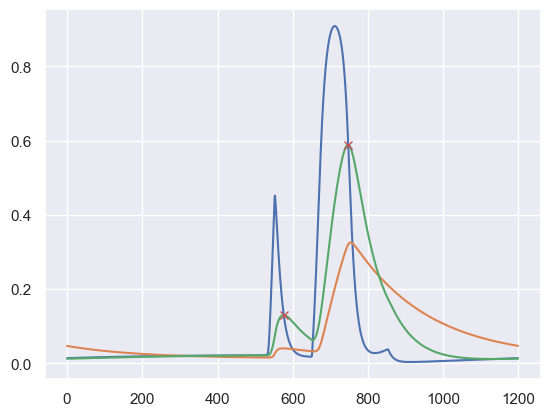

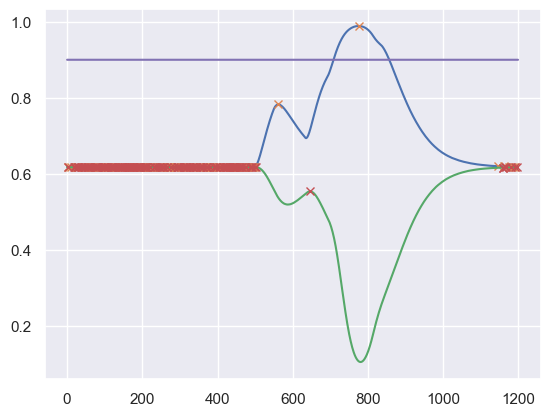

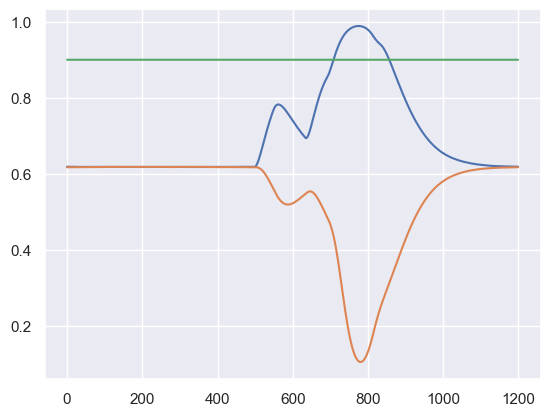

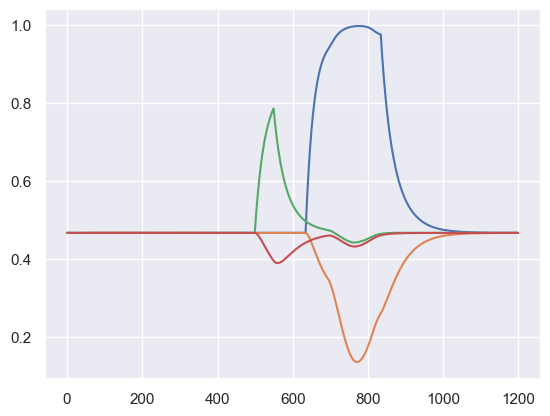

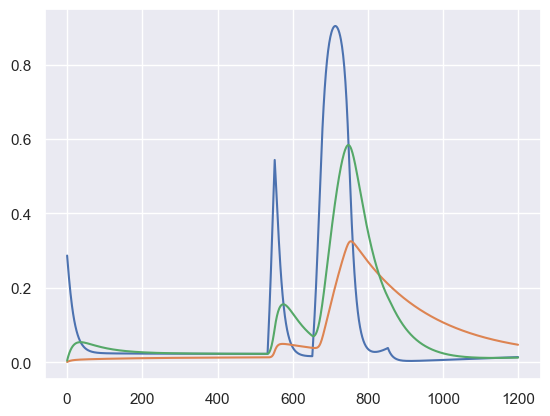

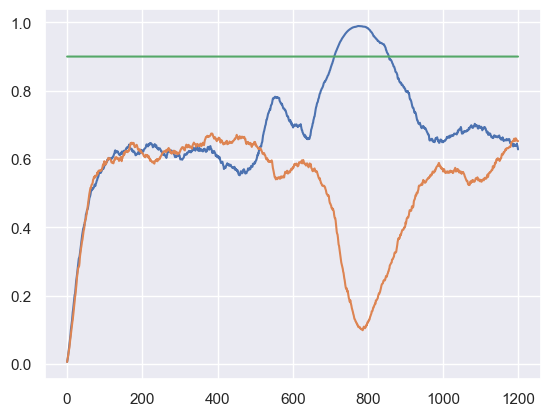

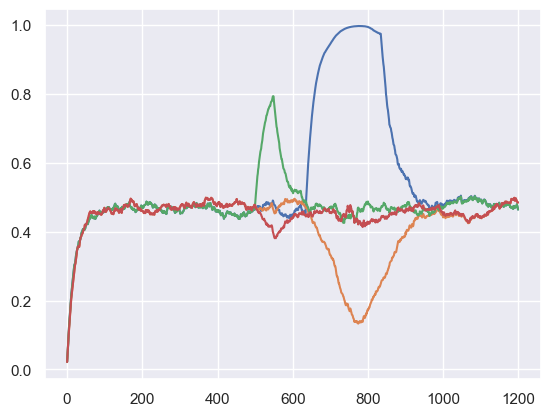

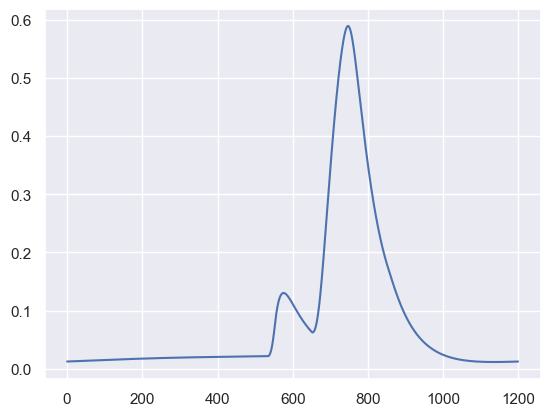

C:\Users\asohr\AppData\Local\Temp\ipykernel_10656\36039870.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["RTs"].fillna(df.groupby(["RTs"])["RTs"].transform("mean"), inplace=True)


count    20000.00000
mean       721.51090
std          3.97371
min        699.00000
25%        719.00000
50%        722.00000
75%        724.00000
max        737.00000
Name: RTs, dtype: float64
prominences inputLayerAtt[2] (array([0.18561888, 0.49132955]), array([0, 0]), array([ 663, 1136]))


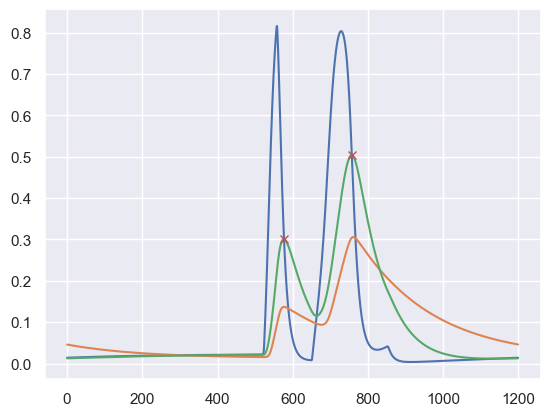

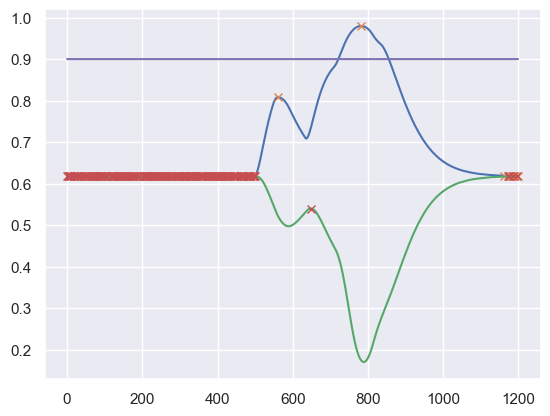

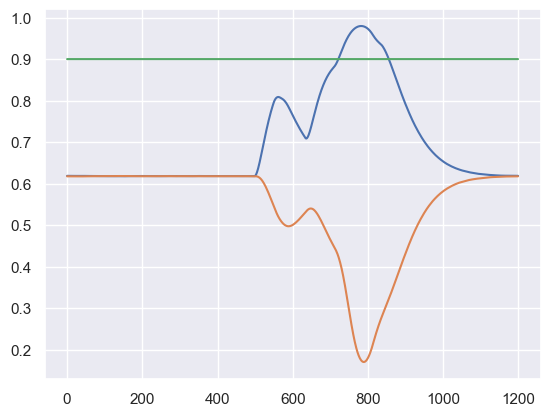

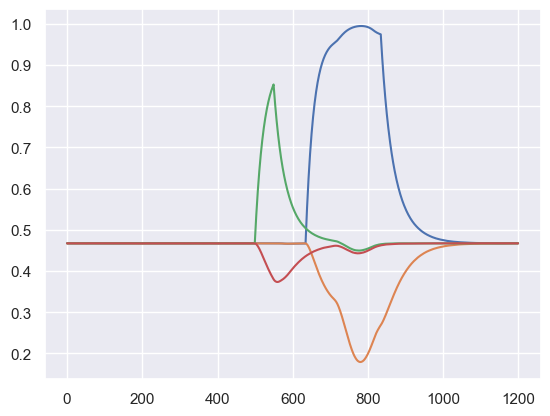

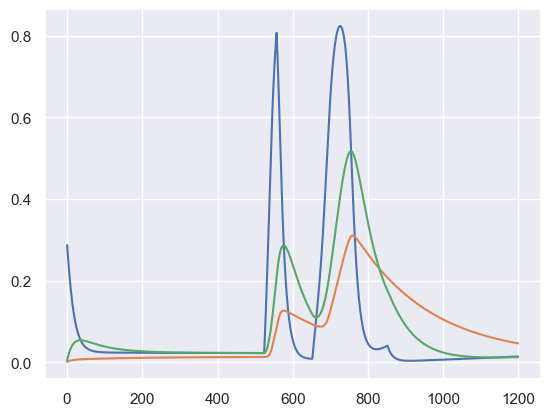

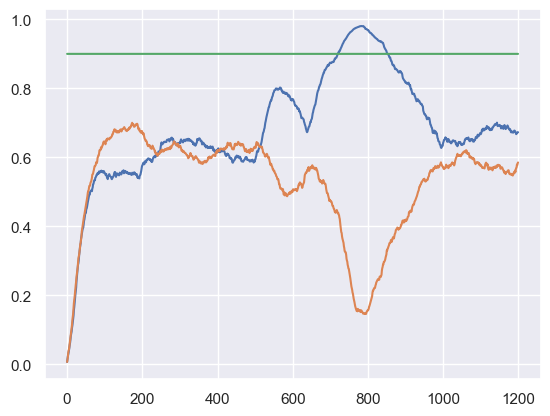

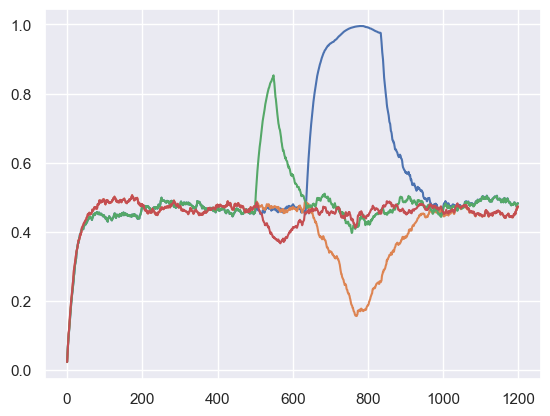

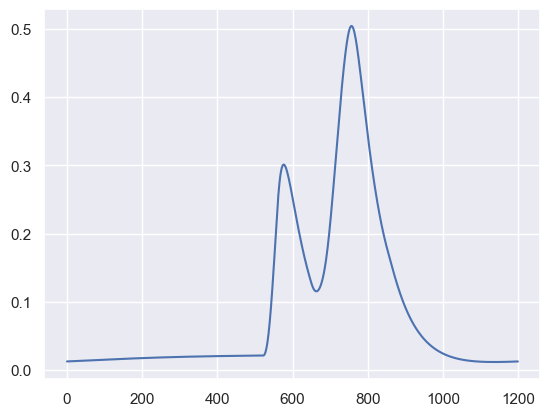

C:\Users\asohr\AppData\Local\Temp\ipykernel_10656\36039870.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["RTs"].fillna(df.groupby(["RTs"])["RTs"].transform("mean"), inplace=True)


count    20000.000000
mean       729.343100
std          8.050057
min        582.000000
25%        725.000000
50%        731.000000
75%        735.000000
max        756.000000
Name: RTs, dtype: float64
prominences inputLayerAtt[2] (array([0.23106182, 0.45259674]), array([0, 0]), array([ 671, 1143]))


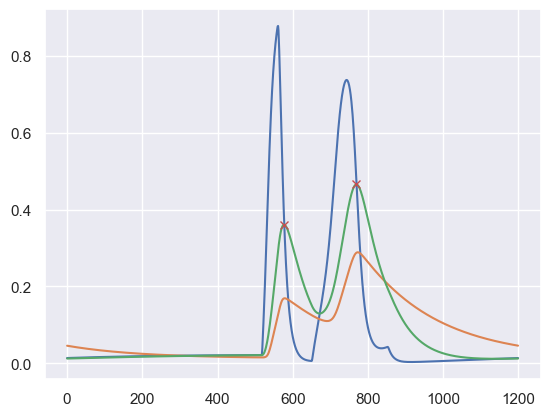

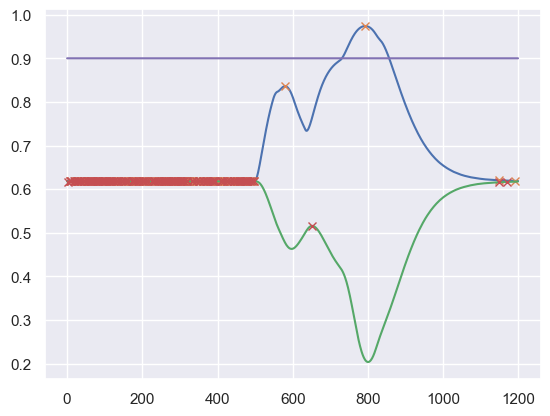

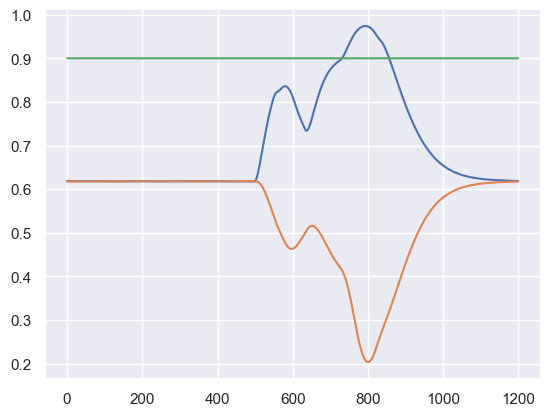

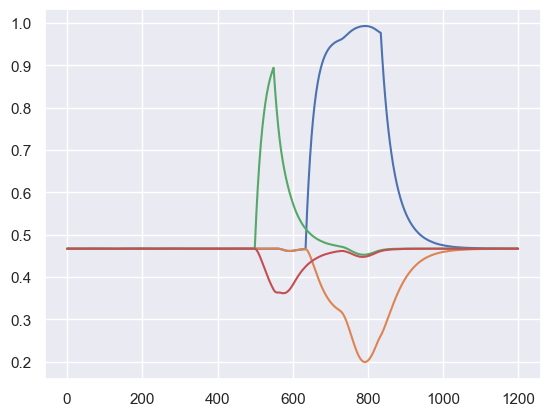

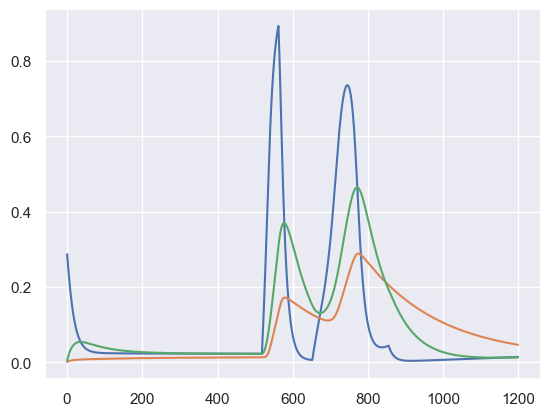

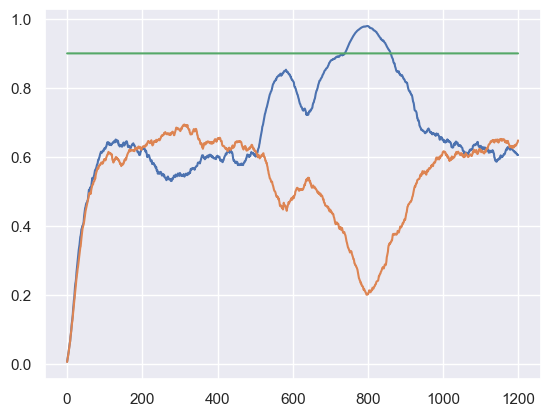

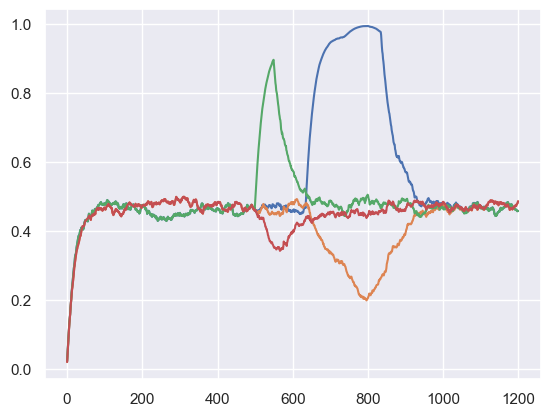

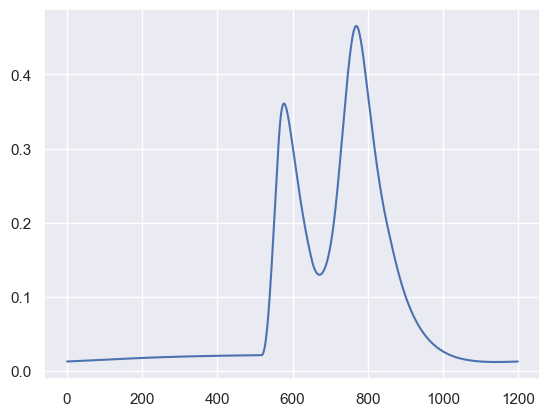

C:\Users\asohr\AppData\Local\Temp\ipykernel_10656\36039870.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["RTs"].fillna(df.groupby(["RTs"])["RTs"].transform("mean"), inplace=True)


count    20000.00000
mean       729.50730
std         18.99632
min        574.00000
25%        722.00000
50%        732.00000
75%        741.00000
max        767.00000
Name: RTs, dtype: float64
prominences inputLayerAtt[2] (array([0.25557903, 0.43404211]), array([0, 0]), array([ 677, 1149]))


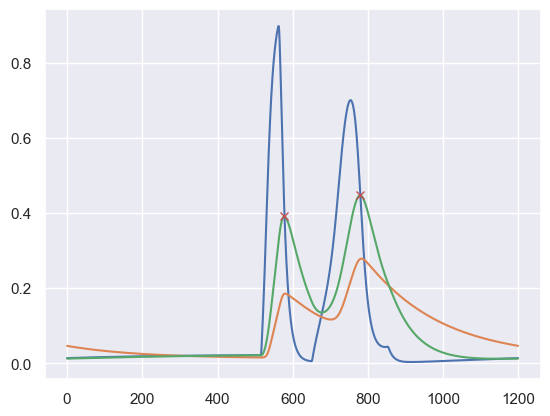

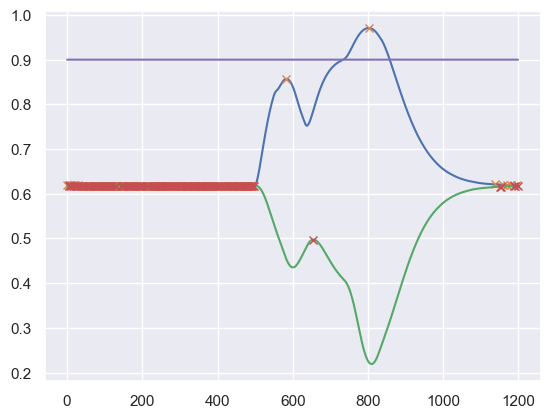

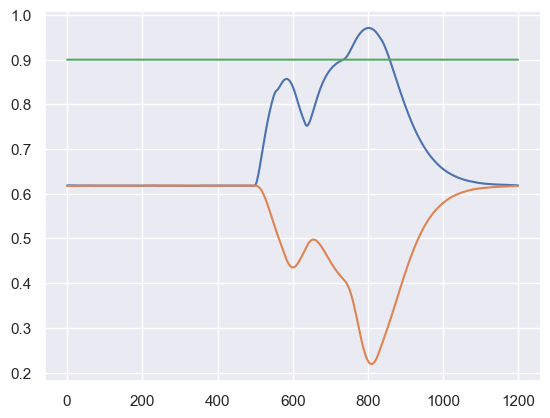

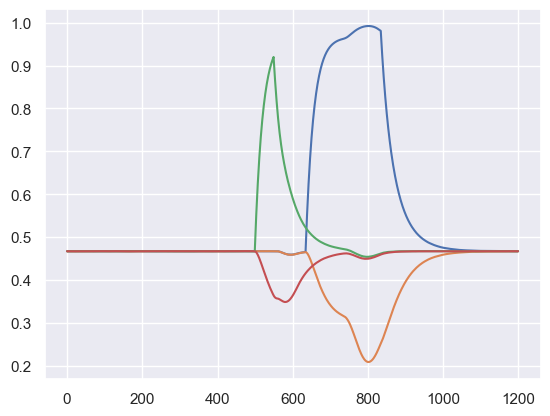

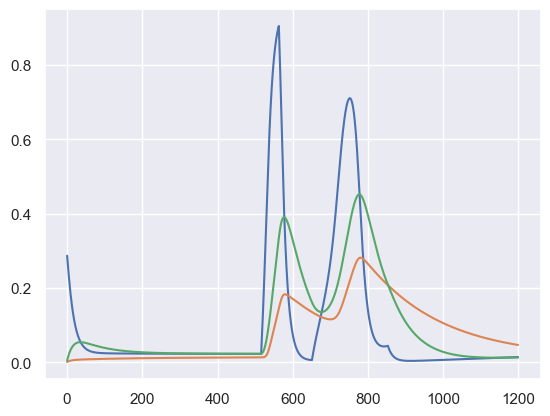

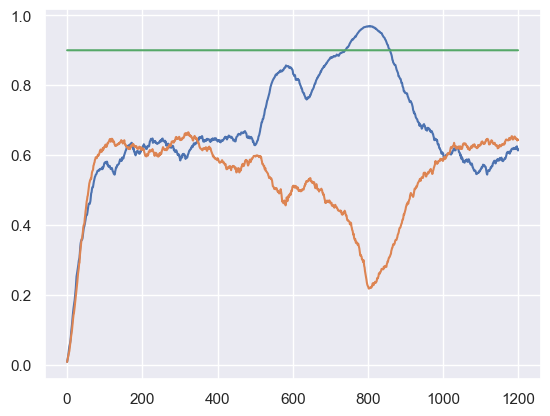

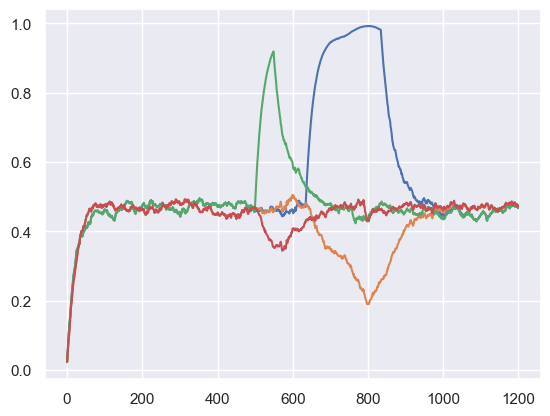

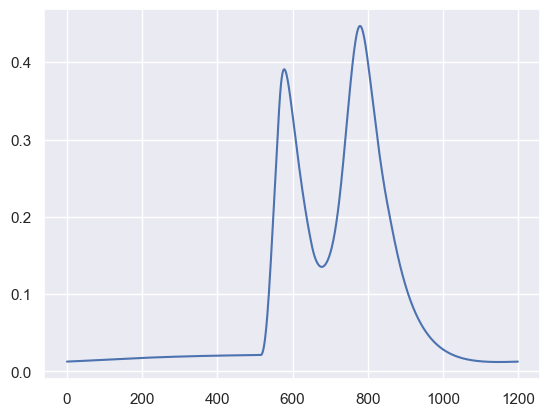

C:\Users\asohr\AppData\Local\Temp\ipykernel_10656\36039870.py:131: FutureWarning: The provided callable <function mean at 0x000001B6432EC9A0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  qual = df1.groupby("Strengh").agg([np.mean, np.std])
C:\Users\asohr\AppData\Local\Temp\ipykernel_10656\36039870.py:131: FutureWarning: The provided callable <function std at 0x000001B6432ECAE0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  qual = df1.groupby("Strengh").agg([np.mean, np.std])
C:\Users\asohr\AppData\Local\Temp\ipykernel_10656\36039870.py:131: FutureWarning: The provided callable <function mean at 0x000001B6432EC9A0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep 

Text(0.5, 0, 'RT')

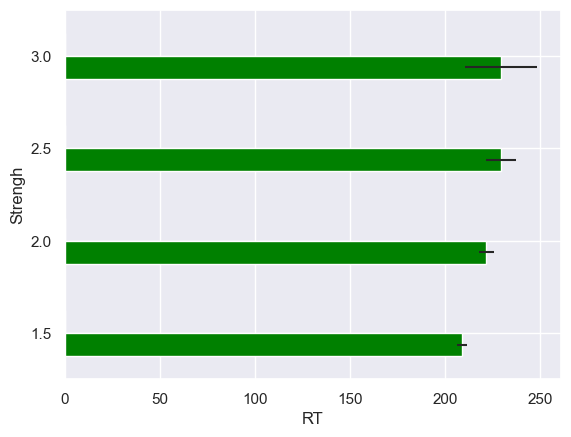

In [7]:
#@title Default title text
# df cong units and RT mean
dfCongruent = pd.DataFrame() #(np.mean(inputLayerAttAll[2],axis=0)[2], columns = ['RTs1'])
sns.set_theme(color_codes=True)

#if (1==2):
for m1 in range (conPrimeArr.size):

  #print (block_no, np.mean(block_no)
  #RT 
  #block_no0=modelRT[m1]
  block_no1 = np.where(modelRT[m1] ==-1, np.nan, modelRT[m1])
  #df = pd.DataFrame(block_no, columns = ['Column_A'])
  #my_array = np.array([1,2,3,np.nan,np.nan,np.nan])
  #df.fillna(df.transform("mean"), inplace=True)
  df = pd.DataFrame(block_no1, columns = ['RTs'])
  df["RTs"].fillna(df.groupby(["RTs"])["RTs"].transform("mean"), inplace=True)
  
  print(df.RTs.describe())
  
  missedTrials = np.count_nonzero(modelRT[m1] == -1)
  prematureTrials=np.count_nonzero(modelRT[m1] <=InterTrial+PrimeDur+MaskTargetISI)
  #print(np.full(10, "-")
  #print("missedTrials", missedTrials, "prematureTrials", prematureTrials)
  modelRT0Count1Mean2STD3Pre4Mis[m1][0]=df.RTs.count()
  modelRT0Count1Mean2STD3Pre4Mis[m1][1]=df.RTs.mean()
  modelRT0Count1Mean2STD3Pre4Mis[m1][2]=df.RTs.std()
  modelRT0Count1Mean2STD3Pre4Mis[m1][3]=missedTrials
  modelRT0Count1Mean2STD3Pre4Mis[m1][4]=prematureTrials
  
  #blocks dynamics mean  
  peaks,_ = find_peaks(np.mean(inputLayerAttAll[m1],axis=0)[2])
  prominences = peak_prominences(np.mean(inputLayerAttAll[m1],axis=0)[2], peaks)
  print("prominences inputLayerAtt[2]", prominences)
  contour_heights = np.mean(inputLayerAttAll[m1],axis=0)[2][peaks] - prominences

  plt.figure(m1)
  plt.plot(np.mean(inputLayerAttAll[m1],axis=0)[0])
  plt.plot(np.mean(inputLayerAttAll[m1],axis=0)[1])
  plt.plot(np.mean(inputLayerAttAll[m1],axis=0)[2])
  plt.plot(peaks, np.mean(inputLayerAttAll[m1],axis=0)[2][peaks], "x")
  #plt.vlines(x=peaks, ymin=contour_heights, ymax=np.mean(inputLayerAttAll[m1],axis=0)[2][peaks])
  plt.show()

  #pl.figure(6)
  #pl.plot(np.mean(inputLayerAttAll[m1],axis=0)[0])
  #pl.plot(np.mean(inputLayerAttAll[m1],axis=0)[1])
  #pl.plot(np.mean(inputLayerAttAll[m1],axis=0)[2])
  #plt.show()

  peaks0,_ = find_peaks(np.mean(inputLayerResponseAll[m1],axis=0)[0])
  prominences0 = peak_prominences(np.mean(inputLayerResponseAll[m1],axis=0)[0], peaks0)
  #print("prominences inputLayerResponseAll[0]", prominences0)
  contour_heights0 = np.mean(inputLayerResponseAll[m1],axis=0)[0][peaks0] - prominences0

  peaks1,_ = find_peaks(np.mean(inputLayerResponseAll[m1],axis=0)[1])
  prominences1 = peak_prominences(np.mean(inputLayerResponseAll[m1],axis=0)[1], peaks1)
  #print("prominences inputLayerResponseAll[1]", prominences1)
  contour_heights1 = np.mean(inputLayerResponseAll[m1],axis=0)[1][peaks1] - prominences1

  plt.figure(m1+1)
  plt.plot(np.mean(inputLayerResponseAll[m1],axis=0)[0])
  plt.plot(peaks0, np.mean(inputLayerResponseAll[m1],axis=0)[0][peaks0], "x")
  #plt.vlines(x=peaks0, ymin=contour_heights0, ymax=np.mean(inputLayerResponseAll[m1],axis=0)[0][peaks0])

  plt.plot(np.mean(inputLayerResponseAll[m1],axis=0)[1])
  plt.plot(peaks1, np.mean(inputLayerResponseAll[m1],axis=0)[1][peaks1], "x")
  #plt.vlines(x=peaks1, ymin=contour_heights1, ymax=np.mean(inputLayerResponseAll,axis=0)[1][peaks1])
  plt.plot(np.full(trial_dur.size,threshResponse))
  plt.show()

  plt.figure(m1+2)
  pl.plot(np.mean(inputLayerResponseAll[m1],axis=0)[0])
  pl.plot(np.mean(inputLayerResponseAll[m1],axis=0)[1])
  pl.plot(np.full(trial_dur.size,threshResponse))
  plt.show()

  plt.figure(m1+3)
  #pl.plot(np.mean(inputLayerMaskAll[m1],axis=0)[0])
  plt.plot(np.mean(inputLayerTargetAll[m1],axis=0)[0])
  plt.plot(np.mean(inputLayerTargetAll[m1],axis=0)[1])
  plt.plot(np.mean(inputLayerPrimeAll[m1],axis=0)[0])
  plt.plot(np.mean(inputLayerPrimeAll[m1],axis=0)[1])  
  #pl.plot(np.full(trial_dur.size,threshResponse))
  plt.show()

  plt.figure(m1+4)
  plt.plot(inputLayerAttAll[m1][0][0])
  plt.plot(inputLayerAttAll[m1][0][1])
  plt.plot(inputLayerAttAll[m1][0][2])
  plt.show()

  plt.figure(m1+5)
  plt.plot(inputLayerResponseAll[m1][0][0])
  plt.plot(inputLayerResponseAll[m1][0][1])
  plt.plot(np.full(trial_dur.size,threshResponse))
  plt.show()

  plt.figure(m1+6)
  #pl.plot(inputLayerMaskAll[m1][0][0])
  plt.plot(inputLayerTargetAll[m1][0][0])
  plt.plot(inputLayerTargetAll[m1][0][1])
  plt.plot(inputLayerPrimeAll[m1][0][0])
  plt.plot(inputLayerPrimeAll[m1][0][1])  
  #pl.plot(np.full(trial_dur.size,threshResponse))
  plt.show()

  #pl.figure(m1+7)
  x=np.array([ireg for ireg in range(trial_dur.size)])
  y=np.mean(inputLayerAttAll[m1],axis=0)[2]
  plt.plot (x,y) 
  #sns.regplot(x, y)
  plt.show()
  
  dfCongruent['Strength '+ str(conPrimeArr[m1])]=np.mean(inputLayerAttAll[m1],axis=0)[2]

df1 = pd.DataFrame({
    #'Strengh': [str(conPrimeArr[0])+' (Very Weak)', str(conPrimeArr[1])+' (Weak)', str(conPrimeArr[2])+' (Strong)',str(conPrimeArr[3])+' (Very Strong)'],
    'Strengh': [str(conPrimeArr[0]), str(conPrimeArr[1]), str(conPrimeArr[2]),str(conPrimeArr[3])],
    'Count': [modelRT0Count1Mean2STD3Pre4Mis[0,0], modelRT0Count1Mean2STD3Pre4Mis[1,0], modelRT0Count1Mean2STD3Pre4Mis[2,0], modelRT0Count1Mean2STD3Pre4Mis[3,0]],
    'Pre': [modelRT0Count1Mean2STD3Pre4Mis[0,3], modelRT0Count1Mean2STD3Pre4Mis[1,3], modelRT0Count1Mean2STD3Pre4Mis[2,3],modelRT0Count1Mean2STD3Pre4Mis[3,3]],
    'Mis': [modelRT0Count1Mean2STD3Pre4Mis[0,4], modelRT0Count1Mean2STD3Pre4Mis[1,4], modelRT0Count1Mean2STD3Pre4Mis[2,4], modelRT0Count1Mean2STD3Pre4Mis[3,4]],

    'mean': [modelRT0Count1Mean2STD3Pre4Mis[0,1]-500, modelRT0Count1Mean2STD3Pre4Mis[1,1]-500, modelRT0Count1Mean2STD3Pre4Mis[2,1]-500, modelRT0Count1Mean2STD3Pre4Mis[3,1]-500],
    #weak1000itr .5: 708.2230-SD2.5416  .75: 720.145-SD3.900922...1^  incong:739.657000-SD4.275703
    #'Input': ['Low', 'Medium', 'High'],
    'std': [modelRT0Count1Mean2STD3Pre4Mis[0,2], modelRT0Count1Mean2STD3Pre4Mis[1,2], modelRT0Count1Mean2STD3Pre4Mis[2,2], modelRT0Count1Mean2STD3Pre4Mis[3,2]]})

# Groupby the quality column using aggregate
# value of mean and std
qual = df1.groupby("Strengh").agg([np.mean, np.std])
#qual = qual['insert']
ax=qual.plot(kind = "barh", y = "mean", legend = False,
          xerr = "std", title = "", color='green')
ax.set_xlabel('RT')
#Table
#np.set_printoptions(precision=1)
#print ("Count    Mean    STD     Pre    Mis")
#print (modelRT0Count1Mean2STD3Pre4Mis)
#df1
# print(df.RTs.describe()) # to add: an array of models df

In [8]:
# df cong
df1

,Strengh,Count,Pre,Mis,mean,std
0,1.5,20000.0,0.0,0.0,208.7194,2.713233
1,2.0,20000.0,0.0,0.0,221.5109,3.973710
2,2.5,20000.0,0.0,3.0,229.3431,8.050057
3,3.0,20000.0,0.0,211.0,229.5073,18.996320


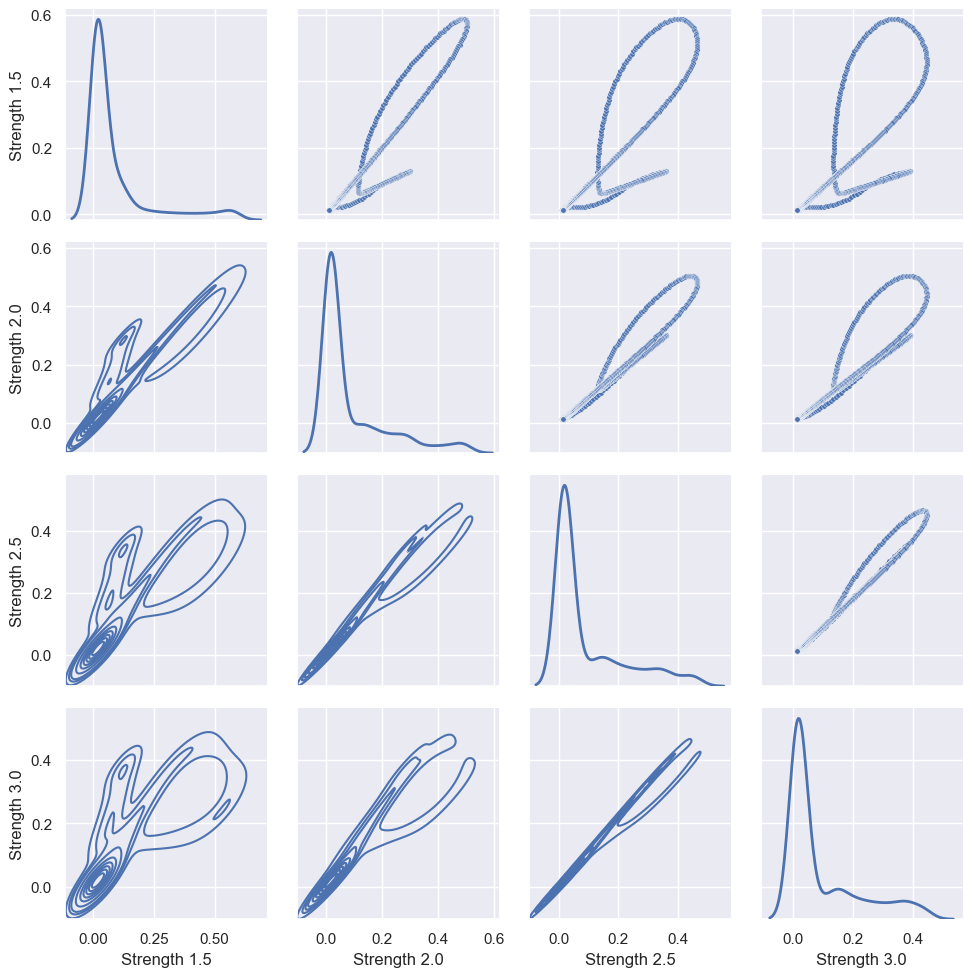

In [9]:
#@title Default title text
#pair graph cong

sns.set_theme(color_codes=True)

#df = sns.load_dataset("penguins")

gC = sns.PairGrid(dfCongruent, diag_sharey=False)
#gI = sns.PairGrid(dfIncongruent, diag_sharey=False)

gC.map_upper(sns.scatterplot, s=15)
gC.map_lower(sns.kdeplot)
gC.map_diag(sns.kdeplot, lw=2)

#gI.map_upper(sns.scatterplot, s=15)
#gI.map_lower(sns.kdeplot)
#gI.map_diag(sns.kdeplot, lw=2)

#df1.describe

In [10]:
#@title Default title text
# df cong units activations 
dfCongruent

,Strength 1.5,Strength 2.0,Strength 2.5,Strength 3.0
0,0.012484,0.012680,0.012760,0.012770
1,0.012506,0.012702,0.012780,0.012789
2,0.012528,0.012725,0.012801,0.012808
3,0.012551,0.012747,0.012822,0.012827
4,0.012574,0.012769,0.012842,0.012846
...,...,...,...,...
1195,0.012376,0.012575,0.012662,0.012680
1196,0.012397,0.012596,0.012681,0.012698
1197,0.012419,0.012617,0.012701,0.012715
1198,0.012440,0.012638,0.012720,0.012733


In [11]:
#pip install similaritymeasures

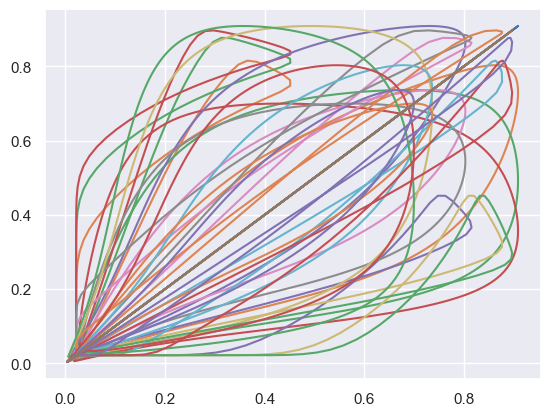

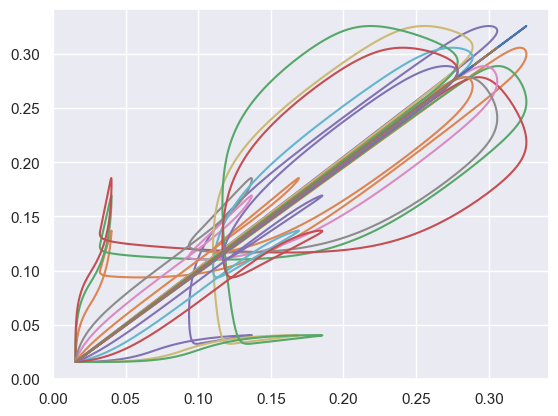

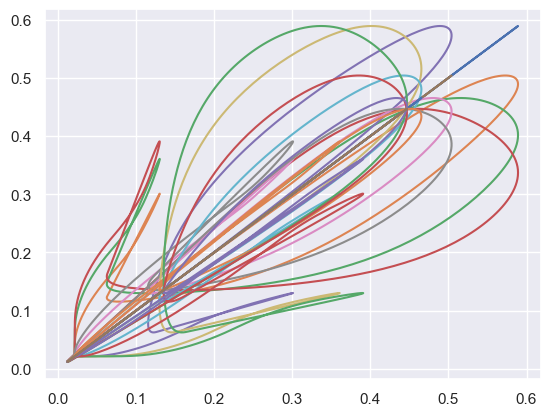

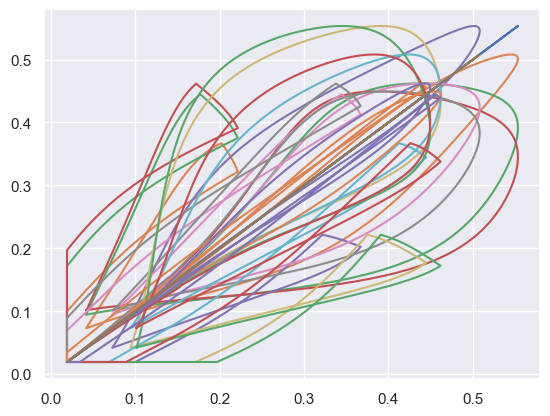

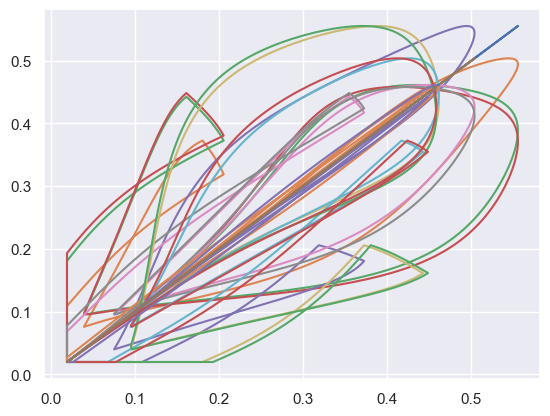

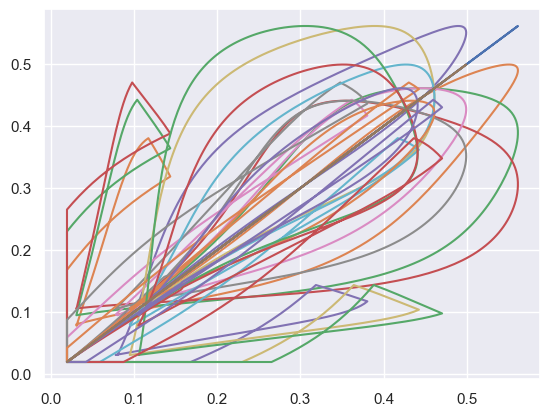

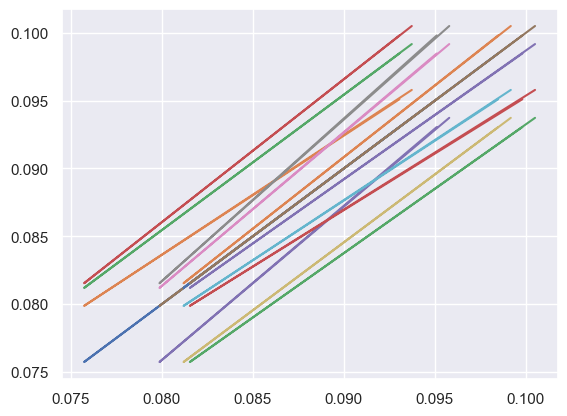

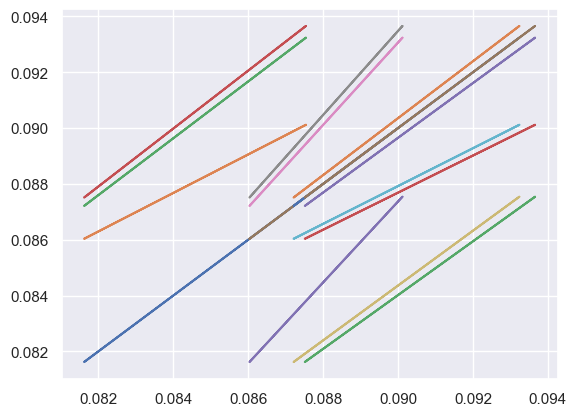

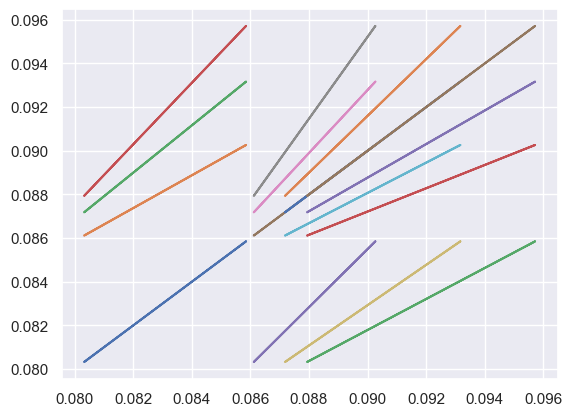

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import similaritymeasures

# Wrap the curve with np.atleast_2d to ensure 2D input
curve0 = np.atleast_2d(np.mean(inputLayerAttAll[0], axis=0)[2])
curve1 = np.atleast_2d(np.mean(inputLayerAttAll[1], axis=0)[2])
curve2 = np.atleast_2d(np.mean(inputLayerAttAll[2], axis=0)[2])
curve3 = np.atleast_2d(np.mean(inputLayerAttAll[3], axis=0)[2])

dif_frechet_dist01 = similaritymeasures.frechet_dist(curve0, curve1)
dif_frechet_dist02 = similaritymeasures.frechet_dist(curve0, curve2)
dif_frechet_dist03 = similaritymeasures.frechet_dist(curve0, curve3)
dif_frechet_dist12 = similaritymeasures.frechet_dist(curve1, curve2)
dif_frechet_dist13 = similaritymeasures.frechet_dist(curve1, curve3)
dif_frechet_dist23 = similaritymeasures.frechet_dist(curve2, curve3)

# Rest of your plotting code remains as is
plt.figure(0)
dif_frechet_dist = np.zeros(16)
it1 = 0
fig = 0
for frech1 in range(conPrimeArr.size):
    for frech2 in range(conPrimeArr.size):
        #dif_frechet_dist44[frech1][frech2] = frech1 * frech2
        plt.figure(0)
        plt.plot(np.mean(inputLayerAttAll[frech1], axis=0)[0],
                 np.mean(inputLayerAttAll[frech2], axis=0)[0])
        plt.figure(1)
        plt.plot(np.mean(inputLayerAttAll[frech1], axis=0)[1],
                 np.mean(inputLayerAttAll[frech2], axis=0)[1])
        plt.figure(2)
        plt.plot(np.mean(inputLayerAttAll[frech1], axis=0)[2],
                 np.mean(inputLayerAttAll[frech2], axis=0)[2])
        plt.figure(3)
        plt.plot(np.mean(inputLayerAttAll[frech1], axis=1)[0],
                 np.mean(inputLayerAttAll[frech2], axis=1)[0])
        plt.figure(4)
        plt.plot(np.mean(inputLayerAttAll[frech1], axis=1)[1],
                 np.mean(inputLayerAttAll[frech2], axis=1)[1])
        plt.figure(5)
        plt.plot(np.mean(inputLayerAttAll[frech1], axis=1)[2],
                 np.mean(inputLayerAttAll[frech2], axis=1)[2])
        plt.figure(6)
        plt.plot(np.mean(inputLayerAttAll[frech1], axis=2)[0],
                 np.mean(inputLayerAttAll[frech2], axis=2)[0])
        plt.figure(7)
        plt.plot(np.mean(inputLayerAttAll[frech1], axis=2)[1],
                 np.mean(inputLayerAttAll[frech2], axis=2)[1])
        plt.figure(8)
        plt.plot(np.mean(inputLayerAttAll[frech1], axis=2)[2],
                 np.mean(inputLayerAttAll[frech2], axis=2)[2])
plt.show()

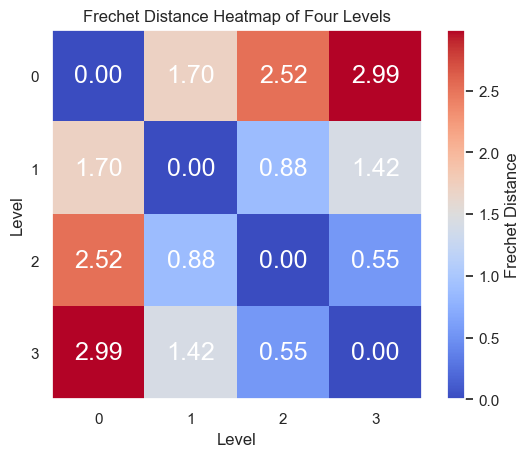

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import similaritymeasures

# Create curves ensuring 2D shape (using same index [2] as before)
curves = [
    np.atleast_2d(np.mean(inputLayerAttAll[i], axis=0)[2])
    for i in range(4)
]

# Initialize a 4x4 matrix for the Frechet distances
dists = np.zeros((4, 4))

# Compute pairwise distances; note that the Frechet distance is symmetric.
for i in range(4):
    for j in range(4):
        if i == j:
            dists[i, j] = 0  # Distance to self is zero.
        else:
            dists[i, j] = similaritymeasures.frechet_dist(curves[i], curves[j])

# Plot the heatmap with a better colormap and no grid lines
plt.figure()
im = plt.imshow(dists, cmap='coolwarm', interpolation='nearest')
plt.colorbar(im, label='Frechet Distance')
plt.title("Frechet Distance Heatmap of Four Levels")
plt.xlabel("Level")
plt.ylabel("Level")
plt.xticks(range(4))
plt.yticks(range(4))
plt.grid(False)  # Disable grid lines

# Add value labels on each cell (using white color for better contrast)
for i in range(dists.shape[0]):
    for j in range(dists.shape[1]):
        plt.text(j, i, f"{dists[i,j]:.2f}",
                 ha='center', va='center', color='white', fontsize=18)

plt.show()

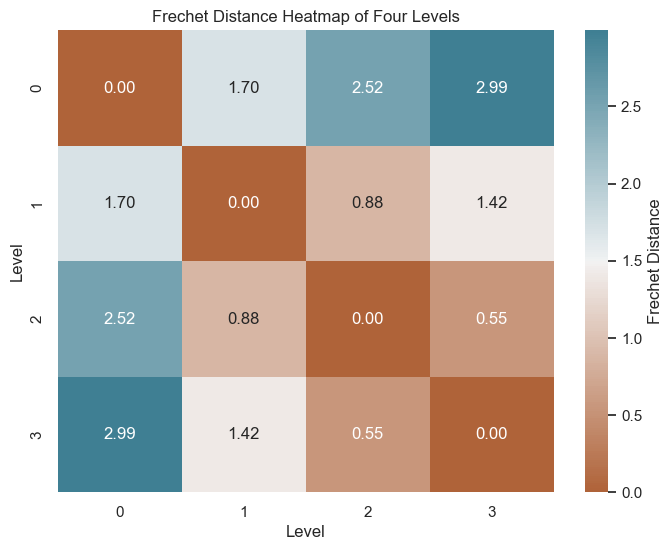

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import similaritymeasures
import seaborn as sns

# Create curves ensuring 2D shape (using same index [2] as before)
curves = [
    np.atleast_2d(np.mean(inputLayerAttAll[i], axis=0)[2])
    for i in range(4)
]

# Initialize a 4x4 matrix for the Frechet distances
dists = np.zeros((4, 4))

# Compute pairwise distances; note that the Frechet distance is symmetric.
for i in range(4):
    for j in range(4):
        if i == j:
            dists[i, j] = 0  # Distance to self is zero.
        else:
            dists[i, j] = similaritymeasures.frechet_dist(curves[i], curves[j])

# Plot the heatmap with seaborn
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    dists,
    cmap=sns.diverging_palette(30, 220, n=200),
    annot=True,
    fmt=".2f",
    cbar_kws={'label': 'Frechet Distance'},
    xticklabels=list(range(4)),
    yticklabels=list(range(4))
)

ax.set_title("Frechet Distance Heatmap of Four Levels")
ax.set_xlabel("Level")
ax.set_ylabel("Level")

plt.show()

In [15]:
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't